In [4]:
from sklearn.datasets import make_classification
import torch
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(
    n_samples=10,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

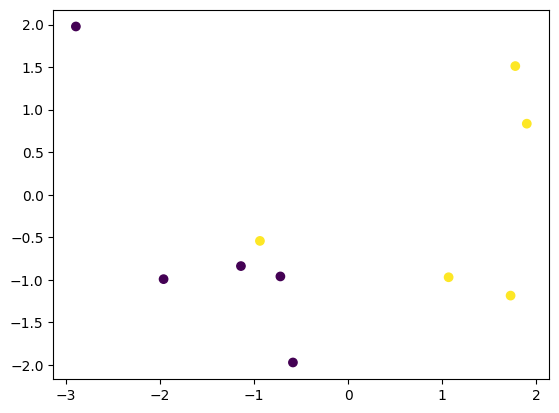

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

In [10]:
from torch.utils.data import Dataset, DataLoader

In [11]:
class CustomDataset(Dataset):

    def __init__(self, features, labels):

        self.features = features
        self.labels = labels
    
    def __len__(self):

        return self.features.shape[0]
    
    def __getitem__(self, index):

        return self.features[index], self.labels[index]

In [12]:
dataset = CustomDataset(X,y)

In [ ]:
# able to find len
len(dataset)

10

In [ ]:
# able to fetch any index
dataset[2]

(tensor([-2.8954,  1.9769]), tensor(0))

In [19]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [20]:
for batch_features, batch_labels in dataloader:
    print(batch_features)
    print(batch_labels)

    print('*'*50)


tensor([[ 1.7273, -1.1858],
        [-0.9382, -0.5430]])
tensor([1, 1])
**************************************************
tensor([[ 1.7774,  1.5116],
        [-2.8954,  1.9769]])
tensor([1, 0])
**************************************************
tensor([[-0.5872, -1.9717],
        [-0.7206, -0.9606]])
tensor([0, 0])
**************************************************
tensor([[-1.1402, -0.8388],
        [ 1.0683, -0.9701]])
tensor([0, 1])
**************************************************
tensor([[-1.9629, -0.9923],
        [ 1.8997,  0.8344]])
tensor([0, 1])
**************************************************


#### applying on real dataset

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()